In [ ]:
%%capture
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sns
sns.set(style="whitegrid")
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA

%matplotlib inline
# for normalization
from sklearn import preprocessing

# for visualization
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# for Machine Learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# for data imbalance, SMOTE
from imblearn.over_sampling import SMOTE
from scipy import stats

# to calculate the performance of the models
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

In [ ]:
import sys
!time pip install rdkit-pypi


real	0m7.301s
user	0m6.934s
sys	0m0.211s


In [ ]:
try:
  from rdkit import Chem
  from rdkit.Chem import Draw
  from rdkit.Chem.Draw import IPythonConsole
except ImportError:
  print('Stopping RUNTIME. Colaboratory will restart automatically. Please run again.')
  exit()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Dataset 3.csv')

In [ ]:
print(df.shape)

(7830, 27)


In [ ]:
df.head()

,Sample,S1,S2,S3,S4,S5,S6,S7,S8,S9,...,S17,S18,S19,S20,S21,S22,S23,S24,S25,S26
0,Compound Annotation,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
1,Compound3606,7.100794,7.021094,6.860640,6.749485,7.115930,7.064487,7.043324,6.737783,6.886519,...,7.085802,7.041529,6.845635,6.930411,6.931105,6.976048,6.921632,6.906005,7.012054,6.846352
2,Compound4232,6.970665,7.462956,7.168991,6.991118,7.280061,7.238557,6.851963,7.626396,7.458830,...,7.508599,7.483239,7.376024,7.520309,7.242210,7.237655,7.485715,7.237865,7.360428,7.418384
3,Compound4686,7.523872,7.347400,6.954722,7.437700,7.022799,7.357667,7.276895,7.063682,6.929440,...,7.330338,6.981667,7.074386,7.427029,7.377689,7.438060,7.376614,7.454465,7.367143,7.107290
4,Compound3119,5.501062,5.589933,5.792813,5.536168,5.418114,5.712752,5.683926,5.467649,5.823713,...,5.475412,5.539875,5.646639,5.485707,5.513848,5.705512,5.747049,5.564420,5.686412,5.538964


In [ ]:
df.sample()

,Sample,S1,S2,S3,S4,S5,S6,S7,S8,S9,...,S17,S18,S19,S20,S21,S22,S23,S24,S25,S26
5749,Compound292,8.295511,8.03856,8.40323,8.47634,7.88641,8.453197,8.476553,8.520782,8.347752,...,8.586636,8.586087,8.435793,8.375962,8.354171,8.595866,8.442226,8.366645,8.412713,8.362498


In [ ]:
df.dtypes

Sample     object
S1        float64
S2        float64
S3        float64
S4        float64
S5        float64
S6        float64
S7        float64
S8        float64
S9        float64
S10       float64
S11       float64
S12       float64
S13       float64
S14       float64
S15       float64
S16       float64
S17       float64
S18       float64
S19       float64
S20       float64
S21       float64
S22       float64
S23       float64
S24       float64
S25       float64
S26       float64
dtype: object

In [ ]:
print(df.columns)

Index(['Sample', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10',
       'S11', 'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18', 'S19', 'S20',
       'S21', 'S22', 'S23', 'S24', 'S25', 'S26'],
      dtype='object')


In [ ]:
df = df.drop(0)
df = df.drop("Sample", axis=1)

In [ ]:
stats = df.describe().T

# Set column names
stats.columns = ['Mean', 'Median', 'Mode', 'Range', 'Var', 'STD', 'Skew', 'Kurtosis']

# Reset index to convert to columns
stats = stats.reset_index(drop=True)

# Join to original dataframe
df = df.join(stats)

In [ ]:
df.head()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S25,S26,Mean,Median,Mode,Range,Var,STD,Skew,Kurtosis
1,7.100794,7.021094,6.860640,6.749485,7.115930,7.064487,7.043324,6.737783,6.886519,6.939119,...,7.012054,6.846352,7829.0,6.794227,0.779459,5.062687,6.506480,6.868445,7.236627,10.094494
2,6.970665,7.462956,7.168991,6.991118,7.280061,7.238557,6.851963,7.626396,7.458830,7.412047,...,7.360428,7.418384,7829.0,6.784990,0.725078,4.879836,6.506019,6.857108,7.212722,9.939223
3,7.523872,7.347400,6.954722,7.437700,7.022799,7.357667,7.276895,7.063682,6.929440,7.359479,...,7.367143,7.107290,7829.0,6.766340,0.750994,4.254446,6.507725,6.851385,7.199357,9.996847
4,5.501062,5.589933,5.792813,5.536168,5.418114,5.712752,5.683926,5.467649,5.823713,5.696869,...,5.686412,5.538964,7829.0,6.771795,0.731544,4.930324,6.502212,6.854449,7.188989,9.843209
5,6.852212,6.912479,7.009587,6.606548,6.950510,6.885695,6.752264,6.582129,7.012768,6.929686,...,6.630255,6.889183,7829.0,6.810448,0.684814,5.142921,6.501197,6.857818,7.212282,9.970454


In [ ]:
df

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S25,S26,Mean,Median,Mode,Range,Var,STD,Skew,Kurtosis
1,7.100794,7.021094,6.860640,6.749485,7.115930,7.064487,7.043324,6.737783,6.886519,6.939119,...,7.012054,6.846352,7829.0,6.794227,0.779459,5.062687,6.506480,6.868445,7.236627,10.094494
2,6.970665,7.462956,7.168991,6.991118,7.280061,7.238557,6.851963,7.626396,7.458830,7.412047,...,7.360428,7.418384,7829.0,6.784990,0.725078,4.879836,6.506019,6.857108,7.212722,9.939223
3,7.523872,7.347400,6.954722,7.437700,7.022799,7.357667,7.276895,7.063682,6.929440,7.359479,...,7.367143,7.107290,7829.0,6.766340,0.750994,4.254446,6.507725,6.851385,7.199357,9.996847
4,5.501062,5.589933,5.792813,5.536168,5.418114,5.712752,5.683926,5.467649,5.823713,5.696869,...,5.686412,5.538964,7829.0,6.771795,0.731544,4.930324,6.502212,6.854449,7.188989,9.843209
5,6.852212,6.912479,7.009587,6.606548,6.950510,6.885695,6.752264,6.582129,7.012768,6.929686,...,6.630255,6.889183,7829.0,6.810448,0.684814,5.142921,6.501197,6.857818,7.212282,9.970454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7825,5.589509,5.595681,5.498271,5.479118,5.519822,5.715686,5.507441,5.565767,5.713218,5.557713,...,5.414816,5.530793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7826,5.609474,5.649846,5.425529,5.528221,5.590074,5.942874,5.555815,5.578123,5.692895,5.457647,...,5.716311,5.185315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7827,5.379222,5.433615,5.634289,5.454004,5.653228,5.691728,5.610132,5.742224,5.685293,5.643485,...,5.576016,5.329911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7828,5.773188,5.830971,5.750347,5.623664,5.743116,5.868217,5.826186,5.849759,5.772457,5.759473,...,5.703481,5.765901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.isnull()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S25,S26,Mean,Median,Mode,Range,Var,STD,Skew,Kurtosis
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7825,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,True,True,True,True,True
7826,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,True,True,True,True,True
7827,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,True,True,True,True,True
7828,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,True,True,True,True,True


In [ ]:
df.isnull().sum()

S1             0
S2             0
S3             0
S4             0
S5             0
S6             0
S7             0
S8             0
S9             0
S10            0
S11            0
S12            0
S13            0
S14            0
S15            0
S16            0
S17            0
S18            0
S19            0
S20            0
S21            0
S22            0
S23            0
S24            0
S25            0
S26            0
Mean        7804
Median      7804
Mode        7804
Range       7804
Var         7804
STD         7804
Skew        7804
Kurtosis    7804
dtype: int64

In [ ]:
df

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S25,S26,Mean,Median,Mode,Range,Var,STD,Skew,Kurtosis
1,7.100794,7.021094,6.860640,6.749485,7.115930,7.064487,7.043324,6.737783,6.886519,6.939119,...,7.012054,6.846352,7829.0,6.794227,0.779459,5.062687,6.506480,6.868445,7.236627,10.094494
2,6.970665,7.462956,7.168991,6.991118,7.280061,7.238557,6.851963,7.626396,7.458830,7.412047,...,7.360428,7.418384,7829.0,6.784990,0.725078,4.879836,6.506019,6.857108,7.212722,9.939223
3,7.523872,7.347400,6.954722,7.437700,7.022799,7.357667,7.276895,7.063682,6.929440,7.359479,...,7.367143,7.107290,7829.0,6.766340,0.750994,4.254446,6.507725,6.851385,7.199357,9.996847
4,5.501062,5.589933,5.792813,5.536168,5.418114,5.712752,5.683926,5.467649,5.823713,5.696869,...,5.686412,5.538964,7829.0,6.771795,0.731544,4.930324,6.502212,6.854449,7.188989,9.843209
5,6.852212,6.912479,7.009587,6.606548,6.950510,6.885695,6.752264,6.582129,7.012768,6.929686,...,6.630255,6.889183,7829.0,6.810448,0.684814,5.142921,6.501197,6.857818,7.212282,9.970454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7825,5.589509,5.595681,5.498271,5.479118,5.519822,5.715686,5.507441,5.565767,5.713218,5.557713,...,5.414816,5.530793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7826,5.609474,5.649846,5.425529,5.528221,5.590074,5.942874,5.555815,5.578123,5.692895,5.457647,...,5.716311,5.185315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7827,5.379222,5.433615,5.634289,5.454004,5.653228,5.691728,5.610132,5.742224,5.685293,5.643485,...,5.576016,5.329911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7828,5.773188,5.830971,5.750347,5.623664,5.743116,5.868217,5.826186,5.849759,5.772457,5.759473,...,5.703481,5.765901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


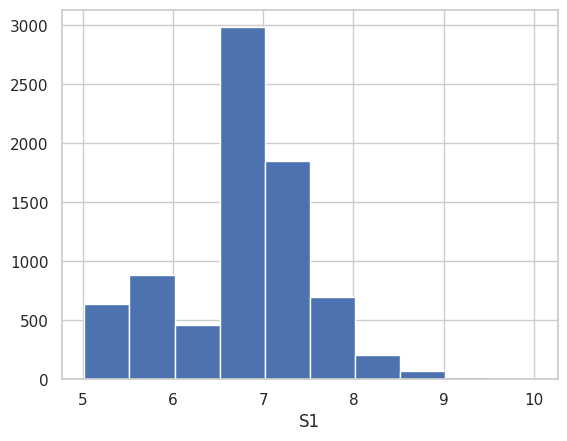

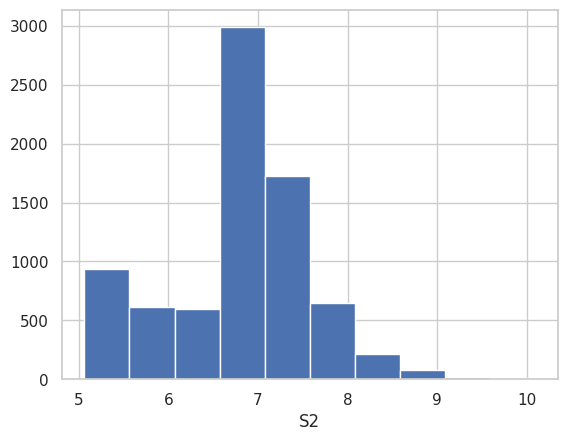

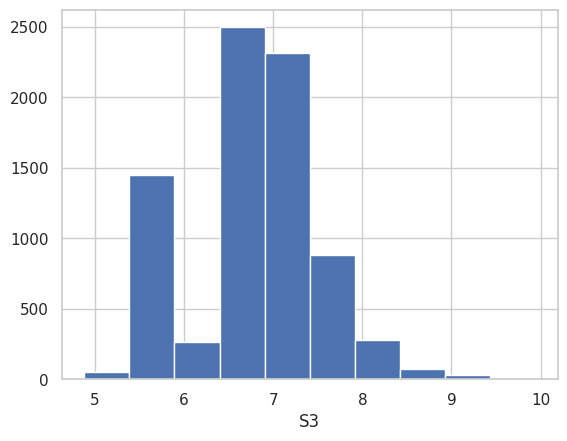

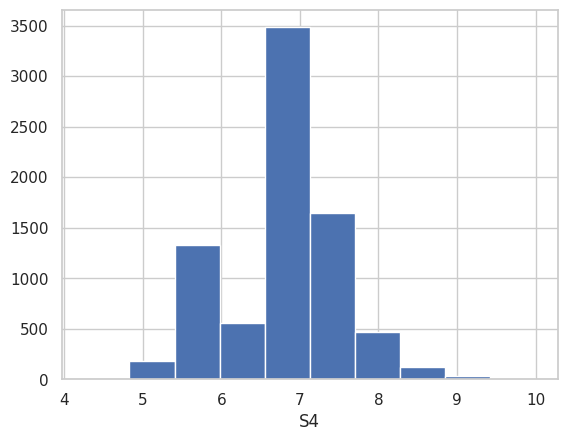

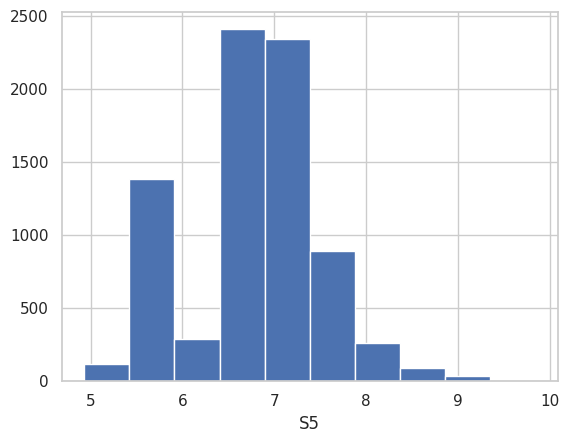

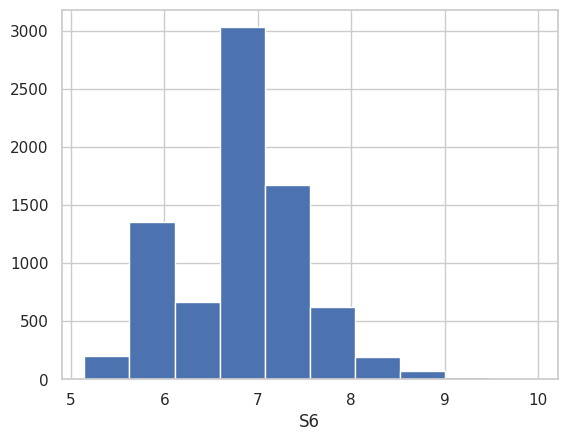

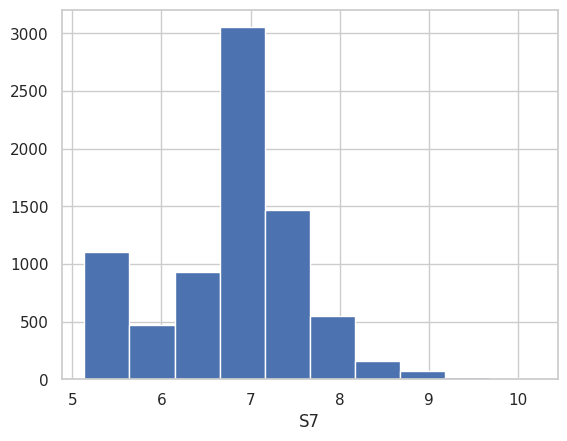

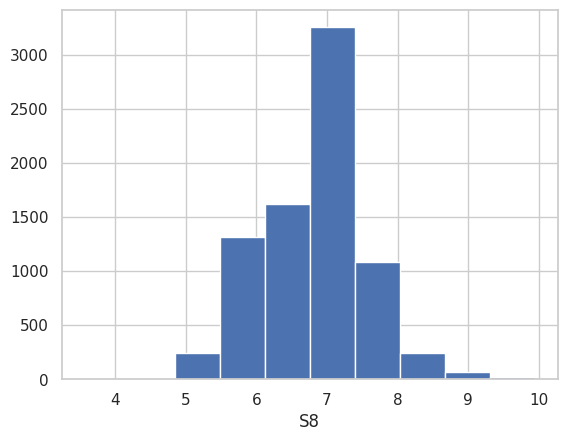

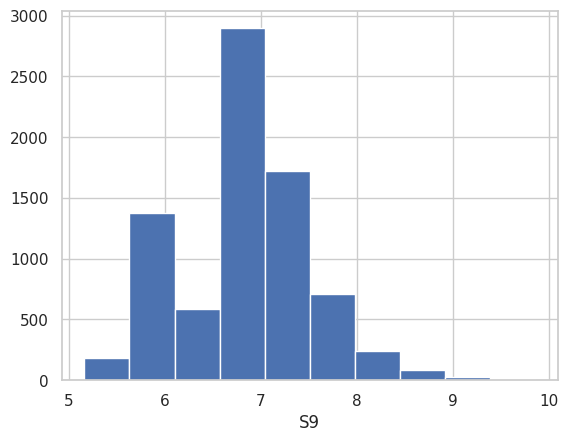

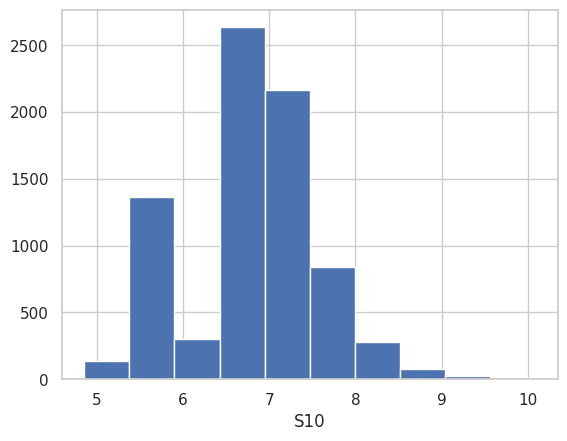

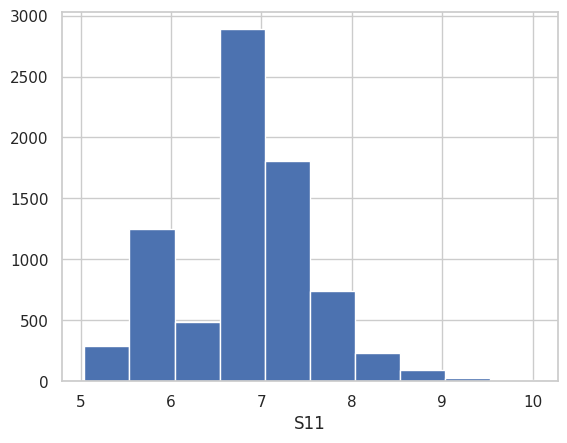

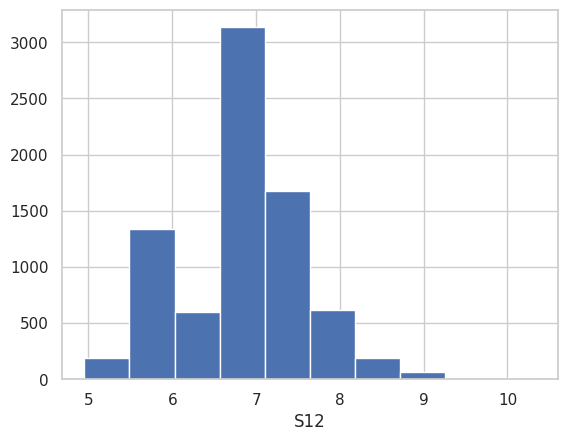

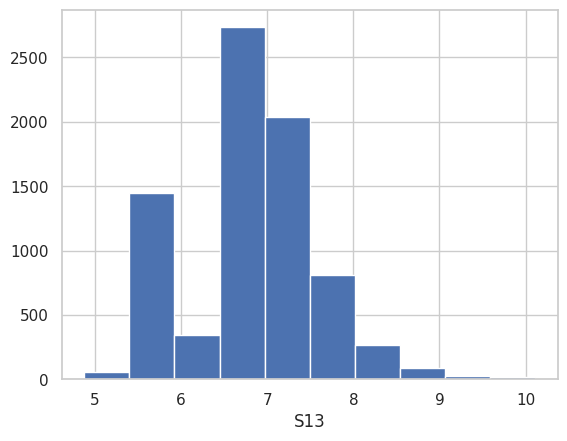

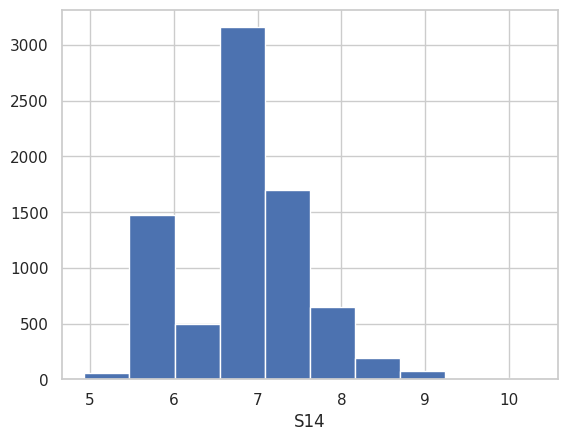

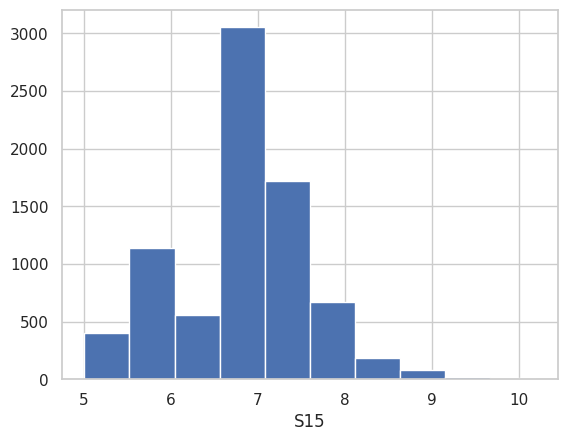

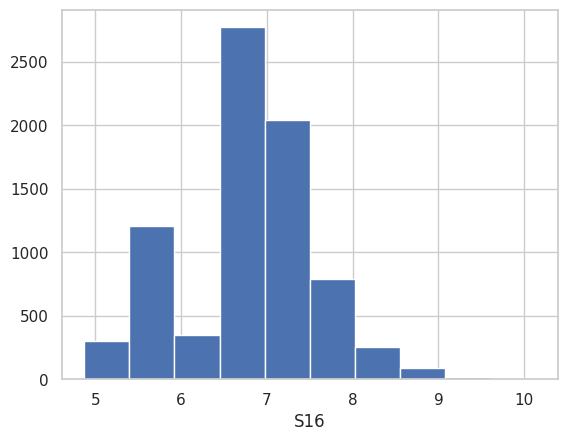

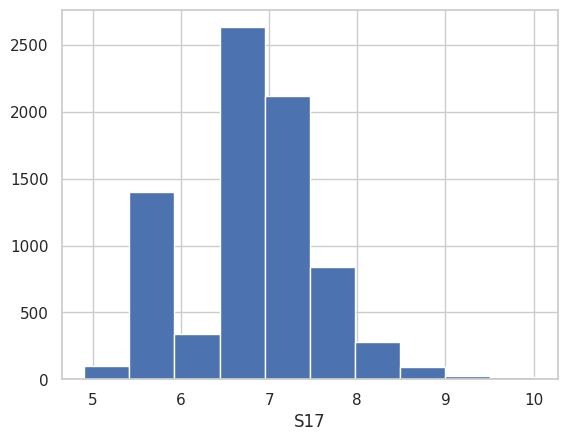

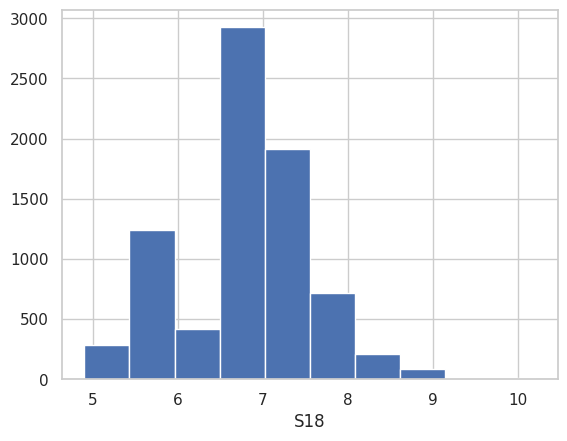

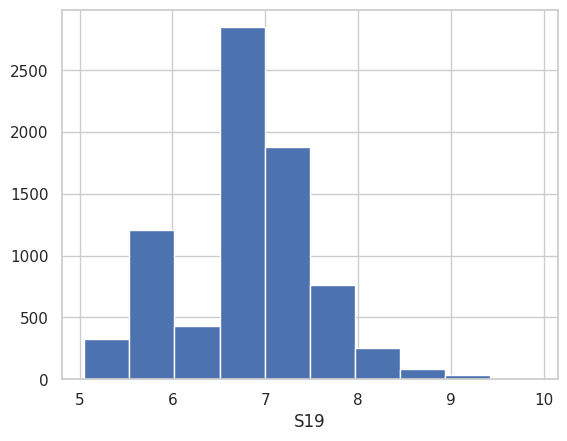

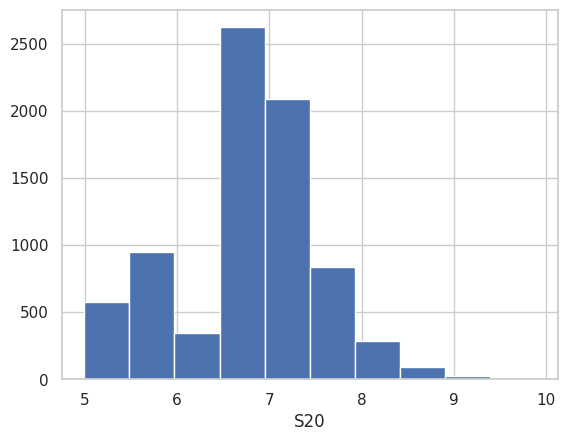

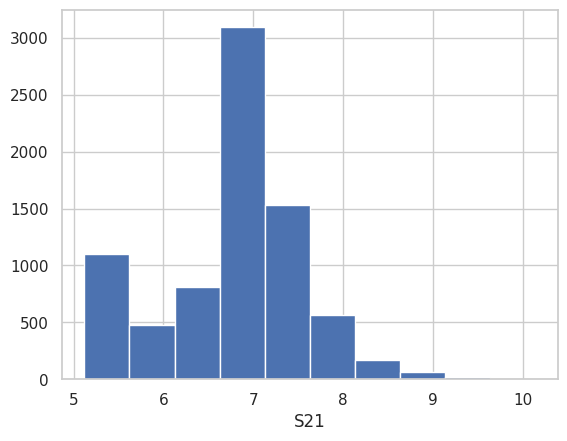

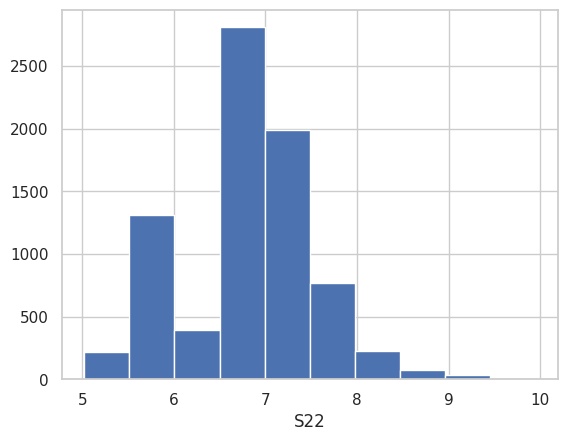

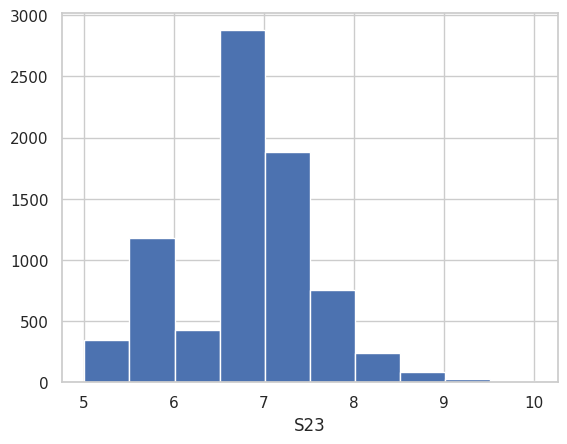

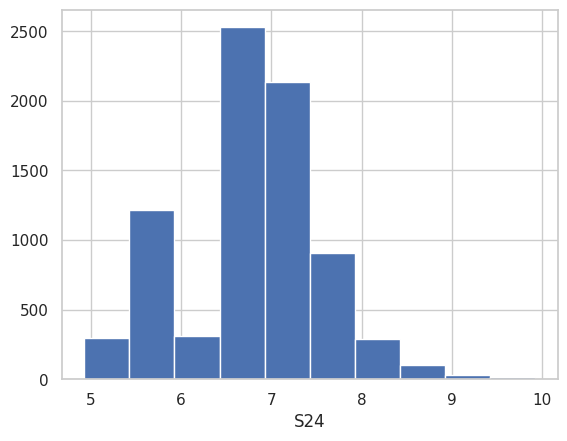

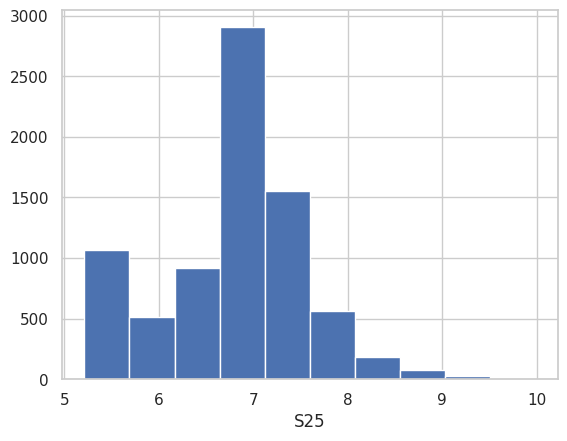

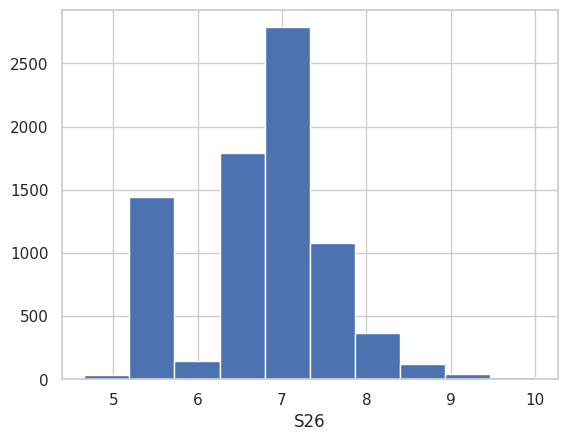

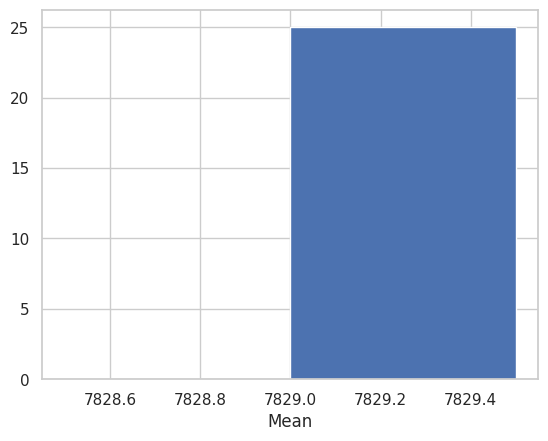

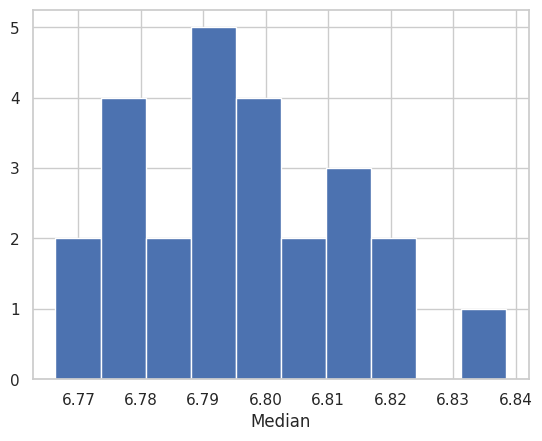

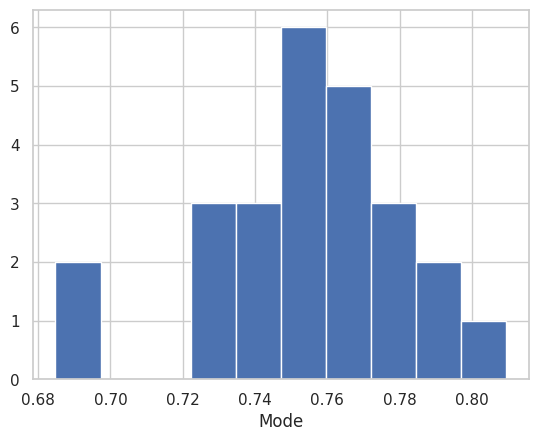

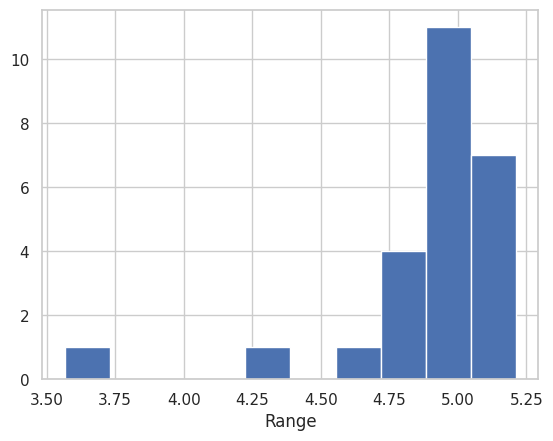

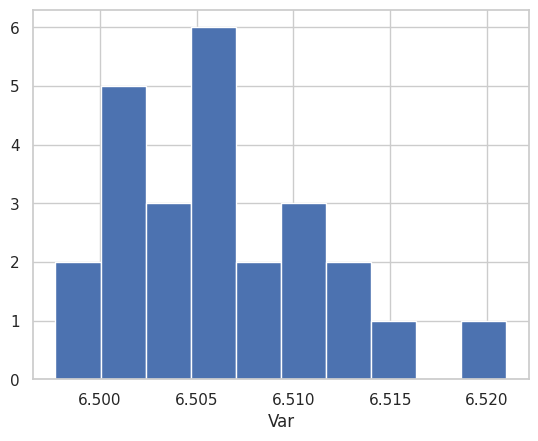

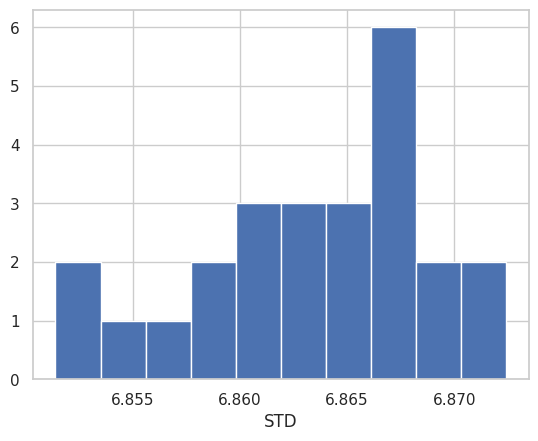

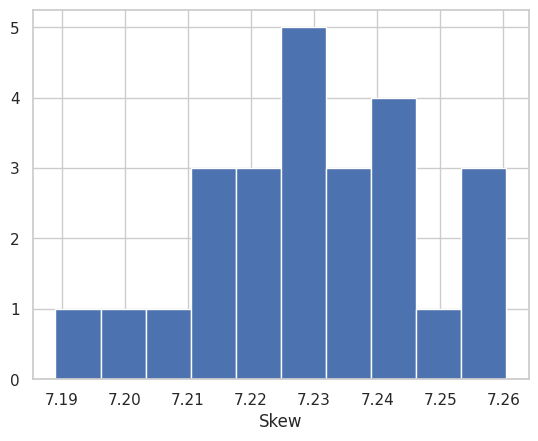

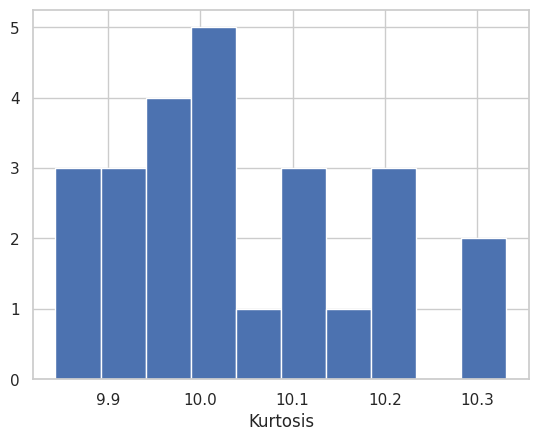

In [ ]:
# Plot histograms for continuous variables

for col in df.columns.values:
  if (df[col].dtypes == 'int64') | (df[col].dtypes == 'float64'):
    plt.hist(df[col],10 if len(pd.unique(df[col]))>20 else len(pd.unique(df[col])))
    plt.xlabel(col)
    plt.show()

In [ ]:
df


,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S25,S26,Mean,Median,Mode,Range,Var,STD,Skew,Kurtosis
1,7.100794,7.021094,6.860640,6.749485,7.115930,7.064487,7.043324,6.737783,6.886519,6.939119,...,7.012054,6.846352,7829.0,6.794227,0.779459,5.062687,6.506480,6.868445,7.236627,10.094494
2,6.970665,7.462956,7.168991,6.991118,7.280061,7.238557,6.851963,7.626396,7.458830,7.412047,...,7.360428,7.418384,7829.0,6.784990,0.725078,4.879836,6.506019,6.857108,7.212722,9.939223
3,7.523872,7.347400,6.954722,7.437700,7.022799,7.357667,7.276895,7.063682,6.929440,7.359479,...,7.367143,7.107290,7829.0,6.766340,0.750994,4.254446,6.507725,6.851385,7.199357,9.996847
4,5.501062,5.589933,5.792813,5.536168,5.418114,5.712752,5.683926,5.467649,5.823713,5.696869,...,5.686412,5.538964,7829.0,6.771795,0.731544,4.930324,6.502212,6.854449,7.188989,9.843209
5,6.852212,6.912479,7.009587,6.606548,6.950510,6.885695,6.752264,6.582129,7.012768,6.929686,...,6.630255,6.889183,7829.0,6.810448,0.684814,5.142921,6.501197,6.857818,7.212282,9.970454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7825,5.589509,5.595681,5.498271,5.479118,5.519822,5.715686,5.507441,5.565767,5.713218,5.557713,...,5.414816,5.530793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7826,5.609474,5.649846,5.425529,5.528221,5.590074,5.942874,5.555815,5.578123,5.692895,5.457647,...,5.716311,5.185315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7827,5.379222,5.433615,5.634289,5.454004,5.653228,5.691728,5.610132,5.742224,5.685293,5.643485,...,5.576016,5.329911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7828,5.773188,5.830971,5.750347,5.623664,5.743116,5.868217,5.826186,5.849759,5.772457,5.759473,...,5.703481,5.765901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<ipython-input-178-51cf91dfebc4>:12: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


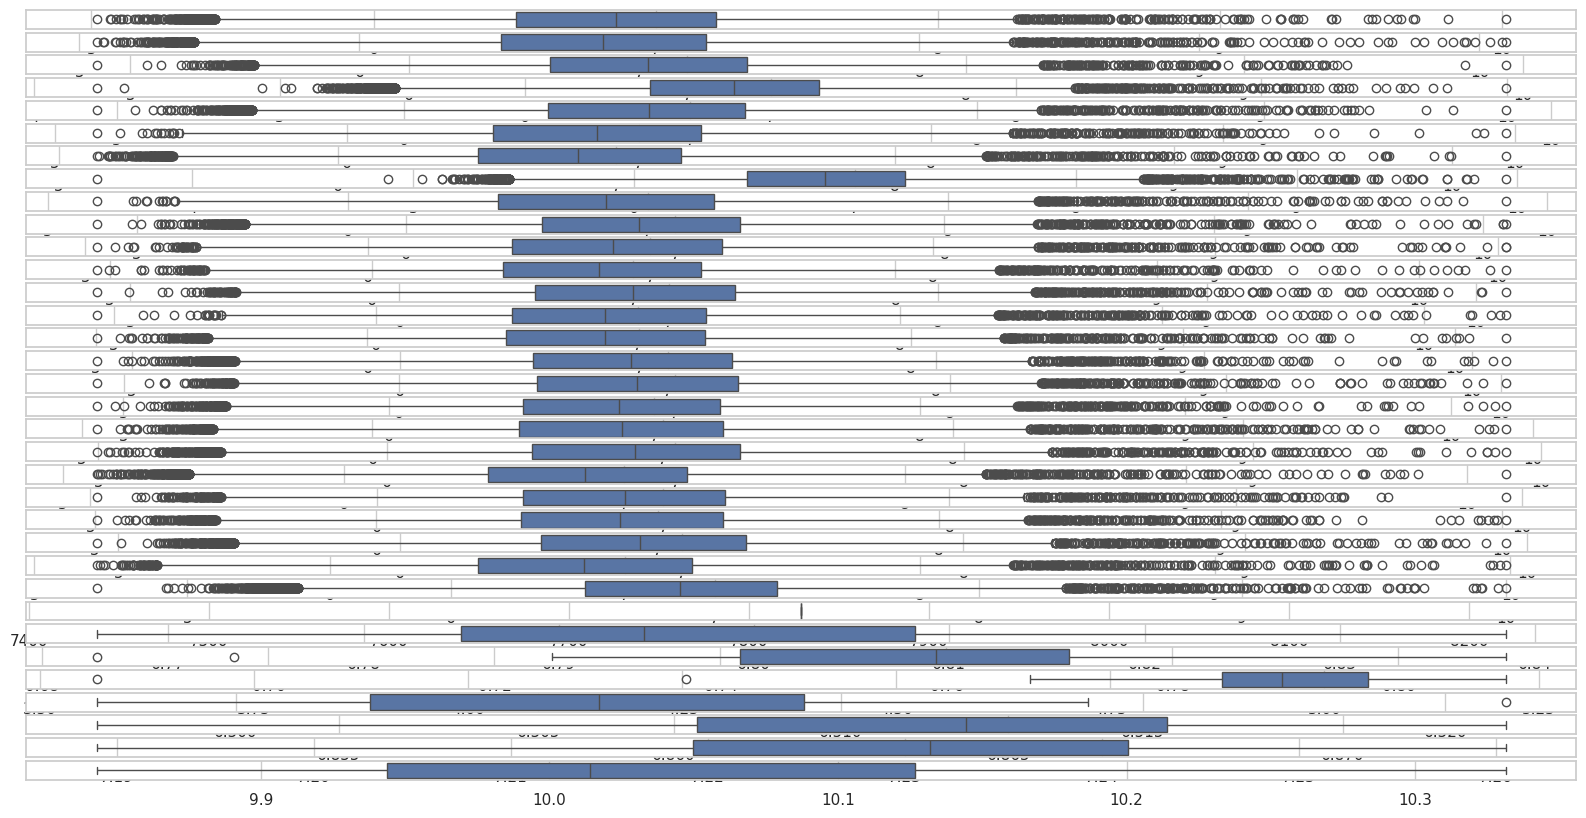

In [ ]:

# Set theme
sns.set_theme(style="whitegrid")

# Plot boxplots in vertical manner
fig, axes = plt.subplots(ncols=1, nrows=df.shape[1], figsize=(20,10))

for i, column in enumerate(df.columns):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set(xlabel='', ylabel='')

# Remove subplot spacing
plt.tight_layout()

# Show plot
plt.show()

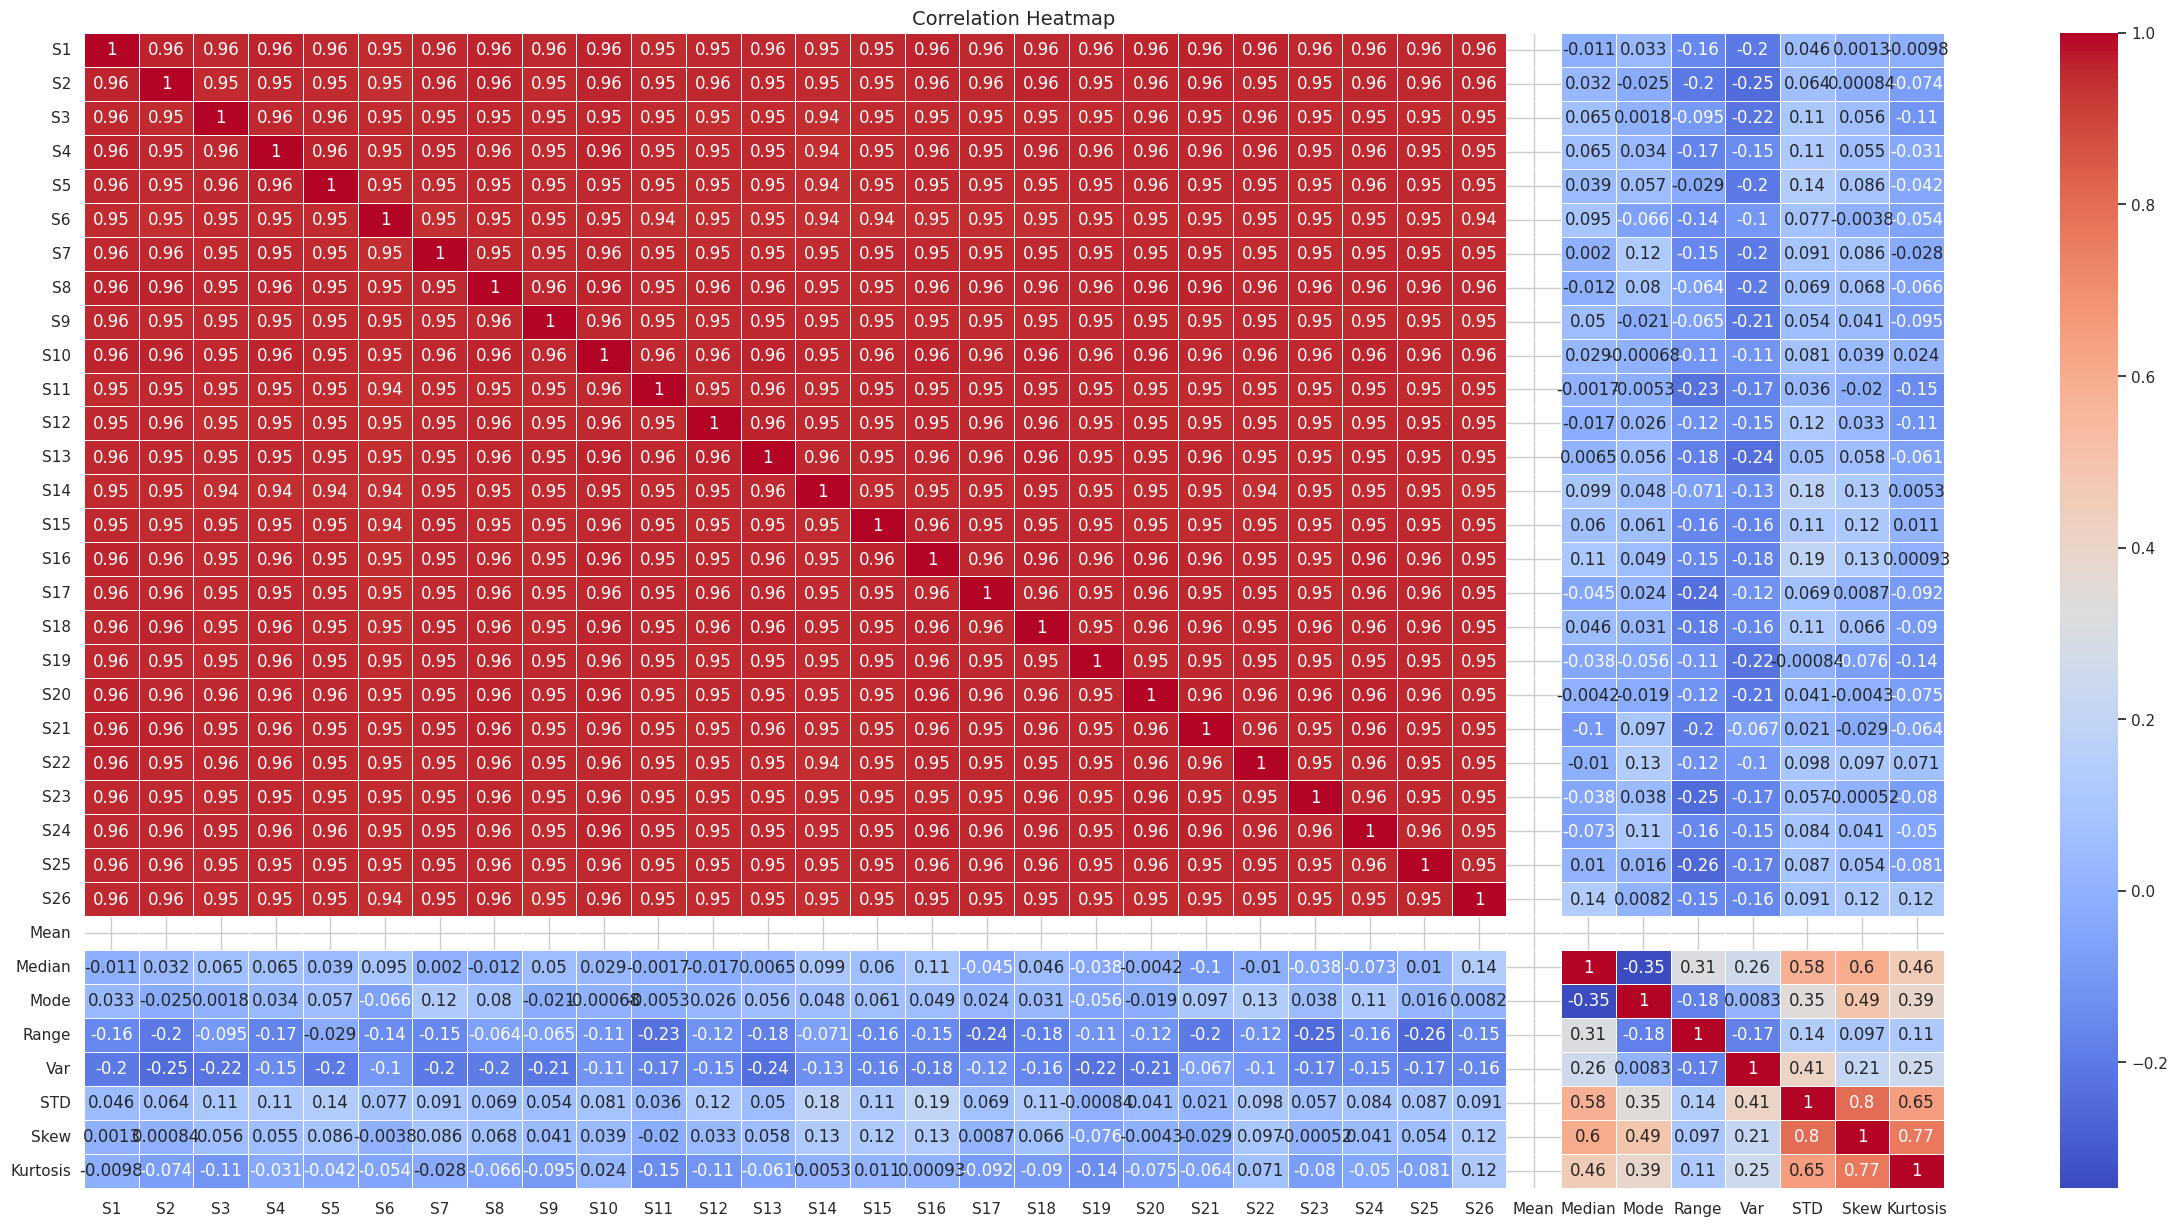

In [ ]:

# Create correlation matrix
corr = df.corr()

# Generate heatmap
fig, ax = plt.subplots(figsize=(30,15))
sns.heatmap(corr,
            cmap='coolwarm',
            annot=True,
            linewidths=0.5,
            ax=ax)

# Set title
ax.set_title('Correlation Heatmap',
              fontsize=14)

# Show plot
plt.show()

In [ ]:
# Select numerical columns and handle zero/negative values
for column in df.select_dtypes(include=['int64', 'float64']):
    if any(df[column] <= 0):
        # Shift values by a constant (example)
        df[column] += 1  # Adjust the constant as needed

# Define the KNN imputer with 5 nearest neighbors
knn_imputer = KNNImputer(n_neighbors=5)

# Perform sample-wise imputation with log transformation
df_imputed = pd.DataFrame(knn_imputer.fit_transform(df), columns=df.columns)
df_imputed = df_imputed.apply(lambda x: np.exp(x)-1 if x.name != 'A' else x) # apply inverse transform to column A

# Apply logarithmic transformation to numerical columns
df_log = df.apply(lambda x: np.log(x) if pd.api.types.is_numeric_dtype(x) else x)

# Create a box plot of the imputed dataset
sns.boxplot(data=df_imputed)
plt.show()

In [ ]:
df_log.head()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S25,S26,Mean,Median,Mode,Range,Var,STD,Skew,Kurtosis
1,1.960207,1.948919,1.925801,1.909466,1.962336,1.955080,1.952080,1.907731,1.929566,1.937175,...,1.947631,1.923716,8.96559,1.916073,-0.249156,1.621897,1.872799,1.926938,1.979155,2.311990
2,1.941711,2.009952,1.969765,1.944641,1.985139,1.979422,1.924535,2.031615,2.009399,2.003107,...,1.996118,2.003961,8.96559,1.914713,-0.321475,1.585112,1.872728,1.925286,1.975846,2.296489
3,2.018081,1.994346,1.939421,2.006562,1.949162,1.995743,1.984704,1.954966,1.935779,1.995989,...,1.997030,1.961121,8.96559,1.911960,-0.286358,1.447964,1.872990,1.924451,1.973992,2.302270
4,1.704941,1.720967,1.756618,1.711303,1.689748,1.742701,1.737642,1.698849,1.761938,1.739917,...,1.738079,1.711808,8.96559,1.912766,-0.312598,1.595405,1.872142,1.924898,1.972551,2.286782
5,1.924572,1.933328,1.947279,1.888061,1.938815,1.929446,1.909878,1.884358,1.947732,1.935814,...,1.891643,1.929952,8.96559,1.918458,-0.378607,1.637621,1.871986,1.925389,1.975785,2.299626


In [ ]:
df.head()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S25,S26,Mean,Median,Mode,Range,Var,STD,Skew,Kurtosis
1,7.100794,7.021094,6.860640,6.749485,7.115930,7.064487,7.043324,6.737783,6.886519,6.939119,...,7.012054,6.846352,7829.0,6.794227,0.779459,5.062687,6.506480,6.868445,7.236627,10.094494
2,6.970665,7.462956,7.168991,6.991118,7.280061,7.238557,6.851963,7.626396,7.458830,7.412047,...,7.360428,7.418384,7829.0,6.784990,0.725078,4.879836,6.506019,6.857108,7.212722,9.939223
3,7.523872,7.347400,6.954722,7.437700,7.022799,7.357667,7.276895,7.063682,6.929440,7.359479,...,7.367143,7.107290,7829.0,6.766340,0.750994,4.254446,6.507725,6.851385,7.199357,9.996847
4,5.501062,5.589933,5.792813,5.536168,5.418114,5.712752,5.683926,5.467649,5.823713,5.696869,...,5.686412,5.538964,7829.0,6.771795,0.731544,4.930324,6.502212,6.854449,7.188989,9.843209
5,6.852212,6.912479,7.009587,6.606548,6.950510,6.885695,6.752264,6.582129,7.012768,6.929686,...,6.630255,6.889183,7829.0,6.810448,0.684814,5.142921,6.501197,6.857818,7.212282,9.970454


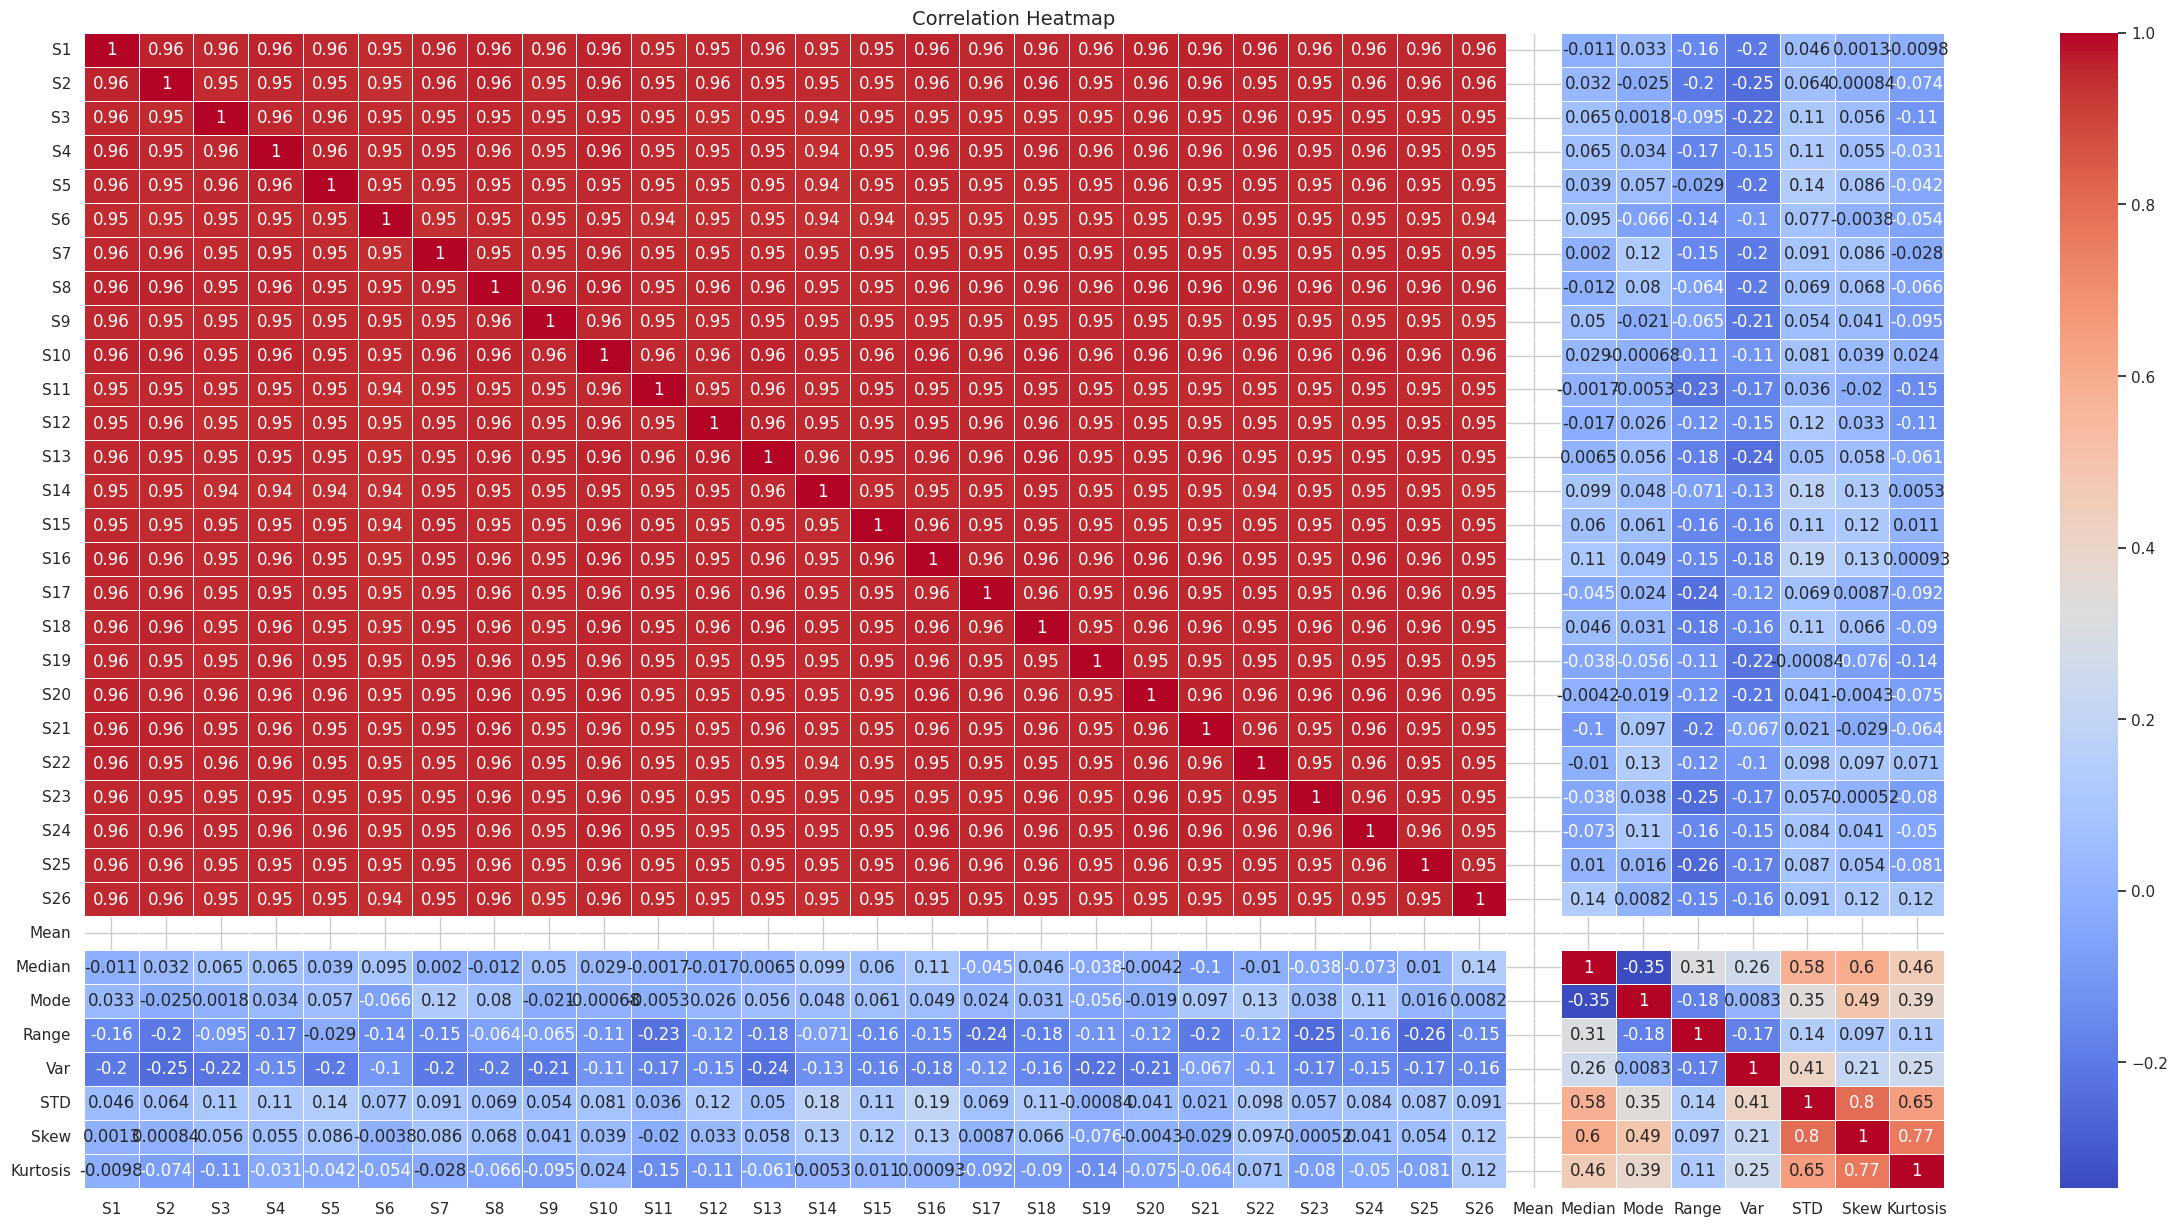

In [ ]:



# Create correlation matrix
corr = df.corr()

# Generate heatmap
fig, ax = plt.subplots(figsize=(30,15))
sns.heatmap(corr,
            cmap='coolwarm',
            annot=True,
            linewidths=0.5,
            ax=ax)

# Set title
ax.set_title('Correlation Heatmap',
              fontsize=14)

# Show plot
plt.show()

            S1        S2        S3        S4        S5        S6        S7  \
1     1.035294  1.022225  1.000515  0.985127  1.038148  1.030136  1.026366   
2     1.016322  1.086557  1.045483  1.020395  1.062093  1.055519  0.998481   
3     1.096979  1.069733  1.014235  1.085576  1.024561  1.072887  1.060403   
4     0.802054  0.813857  0.844789  0.808036  0.790452  0.833028  0.828273   
5     0.999051  1.006411  1.022237  0.964265  1.014014  1.004065  0.983953   
...        ...       ...       ...       ...       ...       ...       ...   
7825  0.814949  0.814694  0.801835  0.799710  0.805290  0.833456  0.802555   
7826  0.817860  0.822580  0.791227  0.806876  0.815539  0.866584  0.809604   
7827  0.784290  0.791098  0.821671  0.796044  0.824753  0.829962  0.817519   
7828  0.841730  0.848951  0.838597  0.820807  0.837867  0.855698  0.849003   
7829  0.821956  0.800421  0.814229  0.814920  0.809575  0.848812  0.822028   

            S8        S9       S10  ...       S25       S26  Me

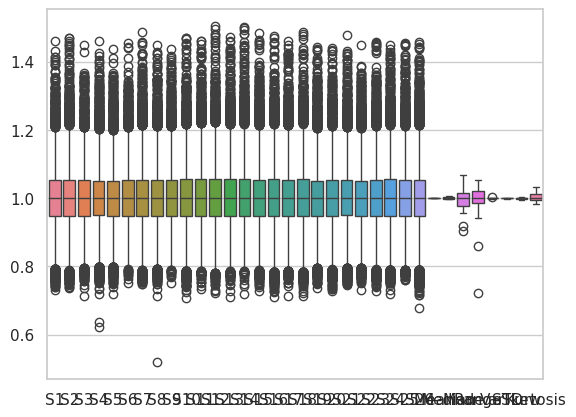

In [ ]:
# Perform median normalization
df_normalized = df.div(df.median())

# Display the normalized data
print(df_normalized)

# Create a box plot of the normalized data
sns.boxplot(data=df_normalized)
plt.show()

In [ ]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df)

# Visualize the result
plt.scatter(principal_components[:,0], principal_components[:,1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values